<a href="https://colab.research.google.com/github/GhanatheAarthi/NavaVirdhi-SentimenatAnalysis/blob/main/VirtusaJatayu(Sentimental_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Sentiment Score code for single product dataset

# Import libraries
from textblob import TextBlob
import pandas as pd

# Read in data
data = pd.read_csv('Boat SM Watch.csv', encoding='ISO-8859-1')

# Define function to get sentiment score
def get_sentiment(row):
    text = row['Body']
    rating = row['Rating']
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    # Adjust sentiment score based on rating
    if rating < 3:
        sentiment -= 0.3
    elif rating > 3:
        sentiment += 0.3
    return sentiment

# Apply sentiment function to data
data['sentiment_score'] = data.apply(get_sentiment, axis=1)

# Calculate overall sentiment score out of 10
overall_sentiment_score = (data['sentiment_score'].mean() + 1) * 5
print(overall_sentiment_score)

6.342541475134878


In [2]:
#Emotion Detection code for the single product
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify the sentiment of a given review
def classify_sentiment(review):
    sentiment_scores = sia.polarity_scores(review)
    
    # Assign the sentiment label based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'happiness'
    elif sentiment_scores['compound'] <= -0.05:
        return 'sadness'
    else:
        return 'neutral'

# Load your dataset and extract the relevant columns (Body of review, Rating)
# Assuming your dataset is stored in a CSV file named 'reviews.csv'
import pandas as pd
df = pd.read_csv('Boat SM Watch.csv',encoding='latin-1')

# Apply sentiment analysis to each review in the dataset
df['Sentiment'] = df['Body'].apply(classify_sentiment)

# Calculate the percentage of each sentiment category
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Print the percentage of happiness, sadness, and neutral reviews
print('Happiness:', sentiment_counts['happiness'])
print('Sadness:', sentiment_counts['sadness'])
print('Neutral:', sentiment_counts['neutral'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Happiness: 66.0
Sadness: 31.0
Neutral: 3.0


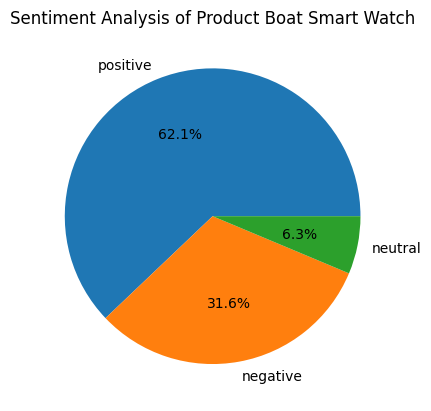

In [4]:
#Graphical reprsentation of sentiments for single product dataset

# Import libraries
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
data = pd.read_csv('Boat SM Watch.csv', encoding='ISO-8859-1')

# Define function to get sentiment score
def get_sentiment(row):
    text = row['Body']
    rating = row['Rating']
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    # Adjust sentiment score based on rating
    if rating < 3:
        sentiment -= 0.3
    elif rating > 3:
        sentiment += 0.3
    return sentiment

# Apply sentiment function to data
data['sentiment_score'] = data.apply(get_sentiment, axis=1)

# Categorize sentiment scores
data['sentiment_category'] = pd.cut(data['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# Create pie chart
sentiment_counts = data['sentiment_category'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Product Boat Smart Watch')
plt.show()

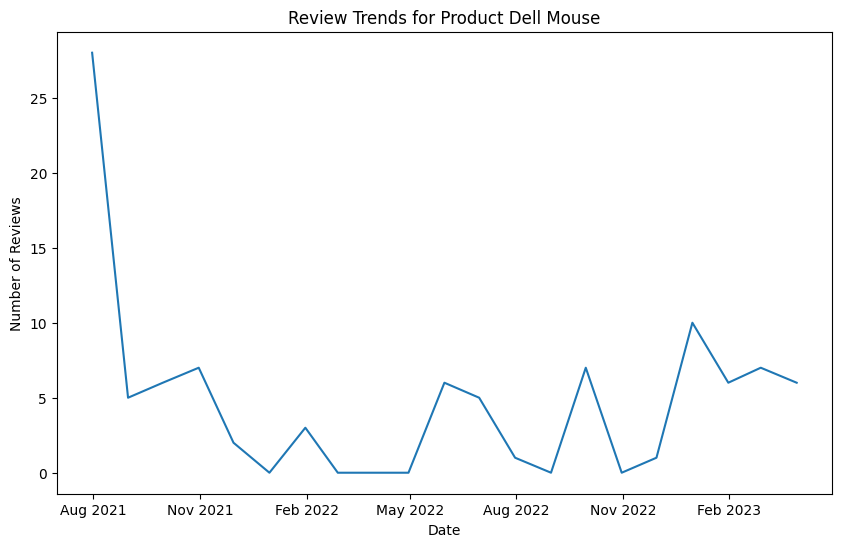

In [5]:
#Seasonal Sales for single product dataset

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read in data
data = pd.read_csv('Boat SM Watch.csv', encoding='ISO-8859-1')

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['Date'])

# Group reviews by month and count the number of reviews for each month
review_counts = data.groupby(pd.Grouper(key='date', freq='M')).size().reset_index(name='count')

# Create line graph of review counts over time
fig, ax = plt.subplots(figsize=(10,6)) # Set figure size
ax.plot(review_counts['date'], review_counts['count'])
ax.set_title('Review Trends for Product Dell Mouse')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Reviews')

# Set x-axis tick format to display only month and year
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Set tick interval
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

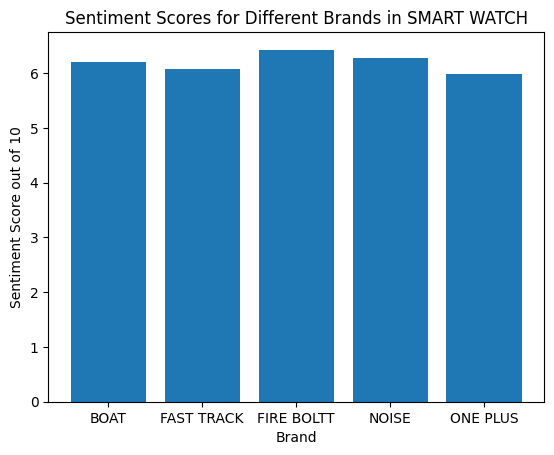

In [6]:
#Brand-wise comparison for a product category

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Read in data
data = pd.read_csv('SMART WATCH.csv', encoding='ISO-8859-1')

# Define category of interest
category_of_interest = 'SMART WATCH'

# Filter data for the category of interest
subset = data[data['Category'] == category_of_interest]

# Calculate sentiment score for each review
subset.loc[:, 'sentiment'] = subset['Body'].apply(lambda x: TextBlob(x).sentiment.polarity)
subset.loc[:, 'sentiment_score'] = (subset['sentiment'] + 1) * 5


# Group data by brand and calculate average sentiment score for each brand
brand_sentiment = subset.groupby('Company')['sentiment_score'].mean().reset_index()

# Create bar graph of sentiment scores for each brand
plt.bar(brand_sentiment['Company'], brand_sentiment['sentiment_score'])
plt.title('Sentiment Scores for Different Brands in {}'.format(category_of_interest))
plt.xlabel('Brand')
plt.ylabel('Sentiment Score out of 10')
plt.show()


In [7]:
#Cross Selling Recommendation for a product of total dataset

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset and extract the relevant columns (Body of review, Category, Company)
# Assuming your dataset is stored in a CSV file named 'reviews.csv'
df = pd.read_csv('AmazonDataset.csv', usecols=['Variation', 'Body', 'Category', 'Company'],encoding='latin-1')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the 'Body of review' column
tfidf_matrix = vectorizer.fit_transform(df['Body'].values.astype('U'))

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get product recommendations based on the 'Body of review' similarity
def get_recommendations(product_id, num_recommendations=5):
    # Get the index of the product based on its ID
    product_index = df[df['Variation'] == product_id].index[0]

    # Get the similarity scores for the product with other products
    sim_scores = list(enumerate(cosine_sim[product_index]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top similar products
    top_indices = [i[0] for i in sim_scores[1:num_recommendations + 1]]

    # Return the recommended product IDs, categories, and companies
    recommended_product_ids = df.loc[top_indices, 'Variation'].values
    recommended_categories = df.loc[top_indices, 'Category'].values
    recommended_companies = df.loc[top_indices, 'Company'].values

    return recommended_product_ids, recommended_categories, recommended_companies

# Example usage: Get 5 product recommendations for a given product ID
product_id = 'B09QKLV4D7'  # Replace with the desired product ID
recommendations, categories, companies = get_recommendations(product_id, num_recommendations=5)

print('Product Recommendations:')
for product_id, category, company in zip(recommendations, categories, companies):
    print('Product ID: {} Category: {} Company: {}'.format(product_id, category, company))


Product Recommendations:
Product ID: B097R34WKJ Category: SMART WATCH Company: NOISE
Product ID: B097R34WKJ Category: SMART WATCH Company: NOISE
Product ID: B09NVPDLNV Category: SMART WATCH Company: NOISE
Product ID: B09NVPDLNV Category: SMART WATCH Company: NOISE
Product ID: B0B3Q23BT4 Category: Smart Phone Company: Google


In [8]:
#cross selling category item matrix
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("AmazonDataset.csv")

# Create a category-item matrix where rows are the categories and columns are the products
category_item_matrix = df.pivot_table(index='Category', columns='Variation', values='Rating').fillna(0)

# Convert the category-item matrix to a sparse matrix
category_item_matrix_sparse = csr_matrix(category_item_matrix.values)

# Calculate the cosine similarity between the categories
category_similarity = cosine_similarity(category_item_matrix_sparse)

# Create a dictionary to store the recommended categories for each category
category_recommendations = {}

# Loop through each category
for idx, category in enumerate(category_item_matrix.index):
    # Get the index of the category in the category-item matrix
    category_idx = category_item_matrix.index.get_loc(category)
    # Get the top 5 similar categories to the current category
    similar_categories = list(category_similarity[category_idx].argsort()[-4:-1])
    # Store the recommended categories in the dictionary
    category_recommendations[category] = [category_item_matrix.index[i] for i in similar_categories]

# Print the recommended categories for a specific category
print(category_recommendations[category])


['LAPTOP', 'SMART WATCH']


In [12]:
# People list for +ve,-ve and neutral

# Create separate DataFrames for positive, negative, and neutral feedback
df = pd.read_csv("Boat SM Watch.csv",encoding="latin-1")
positive_feedback = df[df['Rating'] > 3]
negative_feedback = df[df['Rating'] < 3]
neutral_feedback = df[df['Rating'] == 3]

# Get lists of people under each category
positive_people = positive_feedback['Author'].unique().tolist()
negative_people = negative_feedback['Author'].unique().tolist()
neutral_people = neutral_feedback['Author'].unique().tolist()

# Print the lists of people under each category
print("Positive Feedback People:", positive_people)
print("Negative Feedback People:", negative_people)
print("Neutral Feedback People:", neutral_people)


Positive Feedback People: ['AndyAndy', 'Rupam SarmahRupam Sarmah', 'Ratan K.Ratan K.', 'ROHAN timusROHAN timus', 'HarshHarsh', 'Subhramoy sarkar(SMS)', 'Ankit GargAnkit Garg', 'UmangUmang', 'Aniket sharmaAniket sharma', 'Deepak Karki', 'LazynuggetLazynugget', 'Placeholder', 'Sandeep Saroj', 'JinalJinal', 'payalpayal', 'AR', 'MomoMomo', 'YudiYudi', 'Praharsh M.', 'Amazon Customer', 'ShrutiShruti', 'Ritvik GuptaRitvik Gupta', 'Deepesh Bhagat', 'Mahek AhujaMahek Ahuja', 'Gunjan rautelaGunjan rautela', 'Mangaldeep Chatterjee', 'sangramkeskar', 'Nilesh', 'Pritinov R.Pritinov R.', 'DivyeshDivyesh', 'nikunjnikunj', 'M.MANI', 'Showkat imtiyaz', 'Shri', 'Pradeep Singh ', 'SDas', 'Roshan Sanjay ThoreRoshan Sanjay Thore', 'Khushi YadavKhushi Yadav', 'Siddharth Hanumante', 'Sanyam', 'Amit T.', 'Abilash Nair', 'Krishna', 'ashwini pawar', 'Anurag', 'IndraIndra', 'Smriti J.Smriti J.', 'Anita SinghAnita Singh', 'Dhanya Devaraj', 'Indu PriyaIndu Priya', 'Sibi P.MSibi P.M', 'HuneswarHuneswar', 'Alan Dso

In [13]:
#List of +ve,-ve and neutral reviews

df = pd.read_csv('Boat SM Watch.csv',encoding='latin-1')
positive_features = []
negative_features = []
neutral_features = []
for review in df['Body']:
    sentiment = classify_sentiment(review)
    if sentiment == 'happiness':
        positive_features.append(review)
    elif sentiment == 'sadness':
        negative_features.append(review)
    else:
        neutral_features.append(review)

# Print the list of features for each sentiment category
print('Positive features:')
for feature in positive_features:
    print(feature)

print('\nNegative features:')
for feature in negative_features:
    print(feature)

print('\nNeutral features:')
for feature in neutral_features:
    print(feature)


Positive features:
The media could not be loaded.  Used this watch for over a month now.. Bought it during the first sale.. Keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) Large Curved  Display in this price category - 1.69 inch2) Battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. On standby  while just checking the time occassionally is about 8 days. Pretty good. Full charging time is about 1.5 hours. Decent quality magnetic charging cable provided. Use your own low power adapter, power bank or laptop.3) Has all the necessary health / workout tracking options.. Spo2( Oxymeter), Heart Rate monitor..Accuracy is 95-98%. Sleep tracking is pretty accurate too. Paedometer is accurate most of the times, but sometimes few hundred steps are added randomly without any activity. This happens randomly once in 3-4 days. Stress Monitor is also there but not sure how it's cal

In [14]:
#Words leading +ve,-ve and netural reviews
positive_words = []
negative_words = []
neutral_words = []
for review in df['Body']:
    sentiment = classify_sentiment(review)
    if sentiment == 'happiness':
        positive_words.extend(review.split())
    elif sentiment == 'sadness':
        negative_words.extend(review.split())
    else:
        neutral_words.extend(review.split())

# Print the list of words for each sentiment category
print('Positive words:')
for word in positive_words:
    print(word)

print('\nNegative words:')
for word in negative_words:
    print(word)

print('\nNeutral words:')
for word in neutral_words:
    print(word)

Streaming output truncated to the last 5000 lines.
ruined
or
will
take
extra
efforts.
Best
watch
at
this
affordable
rate,
the
main
thing
i
adore
is
built
in
alexa
and
also
it
has
automatic
brightness
till
level
5
it
comes
with
so
many
features
such
as
SPO2
monitoring
heart
rate
monitoring,
it
has
14
sports
mode
and
is
5ATM
water
resistance.
The
other
thing
i
really
adore
is
the
battery
that
the
watch
has
300
MAh
battery
capacity
which
offers
Upto
7
days
of
battery
life
for
normal
use
and
4-5
days
of
heavy
use
when
fully
charged
The
media
could
not
be
loaded.
You
want
to
purchase
this
smart
watch
for
only
shoow
...
There
is
self
tracking
work
is
best
and
there
are
are
some
wallpapers
only
5
or
6
not
more..
that's
why
I
am
telling
this
watch
is
only
attract
anyone
and
look
nice
The
first
time
when
I
received
the
product,
the
Alarm
feature
was
not
working
from
the
smartwatch.
As
I
get
the
replacement,
I
found
multiple
issues
(missing
features)
which
have
been
fixed
in
the
latest
upgrade.


In [17]:
#Top words assosciated with +ve,-ve,netural reviews

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import defaultdict
nltk.download('punkt')
# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load the NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to extract informative words associated with each sentiment category
def extract_informative_words(reviews, sentiment_category):
    word_scores = defaultdict(int)

    for review in reviews:
        sentiment_scores = sia.polarity_scores(review)

        # Consider only reviews belonging to the specified sentiment category
        if classify_sentiment(sentiment_scores) == sentiment_category:
            # Tokenize the review into words
            words = nltk.word_tokenize(review)

            # Filter out stopwords and punctuation
            words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

            # Update word scores based on sentiment intensity
            for word in words:
                word_scores[word] += sentiment_scores['compound']

    # Sort the words based on their scores
    sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

    return sorted_words[:10]  # Return the top 10 most informative words

# Function to classify the sentiment based on the sentiment scores
def classify_sentiment(sentiment_scores):
    if sentiment_scores['compound'] >= 0.05:
        return 'happiness'
    elif sentiment_scores['compound'] <= -0.05:
        return 'sadness'
    else:
        return 'neutral'

# Load your dataset and extract the relevant columns (Body of review, Rating)
# Assuming your dataset is stored in a CSV file named 'reviews.csv'
import pandas as pd
df = pd.read_csv('Boat SM Watch.csv',encoding='latin-1')

# Apply sentiment analysis to each review in the dataset
df['Sentiment'] = df['Body'].apply(lambda x: classify_sentiment(sia.polarity_scores(x)))

# Extract informative words for each sentiment category
positive_words = extract_informative_words(df[df['Sentiment'] == 'happiness']['Body'], 'happiness')
negative_words = extract_informative_words(df[df['Sentiment'] == 'sadness']['Body'], 'sadness')
neutral_words = extract_informative_words(df[df['Sentiment'] == 'neutral']['Body'], 'neutral')

# Print the top informative words for each sentiment category
print('Top words associated with happiness:')
for word, score in positive_words:
    print(word, score)

print('\nTop words associated with sadness:')
for word, score in negative_words:
    print(word, score)

print('\nTop words associated with neutral:')
for word, score in neutral_words:
    print(word, score)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words associated with happiness:
watch 94.0154
good 36.74479999999999
alexa 31.844599999999993
product 25.572099999999995
app 22.221799999999995
boat 21.420099999999998
display 19.5191
battery 17.7749
days 17.715300000000003
use 17.499499999999998

Top words associated with sadness:
dial -0.1103
bcz -0.1103
okay -0.1103
noise -0.1103
writing -0.128
fine -0.128
suddenly -0.128
power -0.128
neither -0.128
still -0.1655

Top words associated with neutral:
good 0.0258
product 0.0258
accurate 0.0258
bpm 0.0258
stress 0.0258
moniter 0.0258
also 0.0258
provide 0.0258
alexa 0.0258
working 0.0258
